# Notebook to generate a PSTH plot.

This notebook will generate a PSTH plot, by default for Unit 151 for session
2022-06-01 of monkey P.

If you want to generate PSTHs for other units or other sessions, you must have
populated the directory
`../../cache/phys_processing/spikes_to_trials/spikes_per_trial/$subject/$session/...`.
You can do that by running the script `../spikes_to_trials/run_spikes_per_trial.py`.

In [ ]:
"""Imports."""

import pickle
from pathlib import Path
import run_triangle

import pandas as pd
from matplotlib import pyplot as plt

In [5]:
"""Constants."""

SPIKE_COUNTS_DATA_DIR = Path("../../cache/phys_processing/spikes_to_trials/spikes_per_trial")
WRITE_DIR = Path("../../cache/phys_processing/psths")
BEHAVIOR_CACHE_PATH_TRIANGLE = Path("../../cache/behavior/triangle.csv")
PALETTE = {
    (0,): (1, 0, 0),
    (1,): (0, 1, 0),
    (2,): (0, 0, 1),
    (0, 1): (0.7, 0.7, 0),
    (0, 2): (0.7, 0, 0.7),
    (1, 2): (0, 0.7, 0.7),
    (0, 1, 2): (0.5, 0.5, 0.5),
}
DASHES = {
    0: (1.0, 0.0),
    1: (1.0, 1.0),
    2: (3.0, 1.5),
}
STIM_TIME_WINDOW = (0, 2500)  # Time window for stimulus phase in ms
CUE_TIME_WINDOW = (0, 500)  # Time window for cue phase in ms, relative to cue onset

In [6]:
"""Load data."""

SUBJECT = "Perle"
SESSION = "2022-06-01"

triangle_behavior = pd.read_csv(BEHAVIOR_CACHE_PATH_TRIANGLE)
session_behavior = triangle_behavior[
    (triangle_behavior["subject"] == SUBJECT) &
    (triangle_behavior["session"] == SESSION)
].reset_index(drop=True)

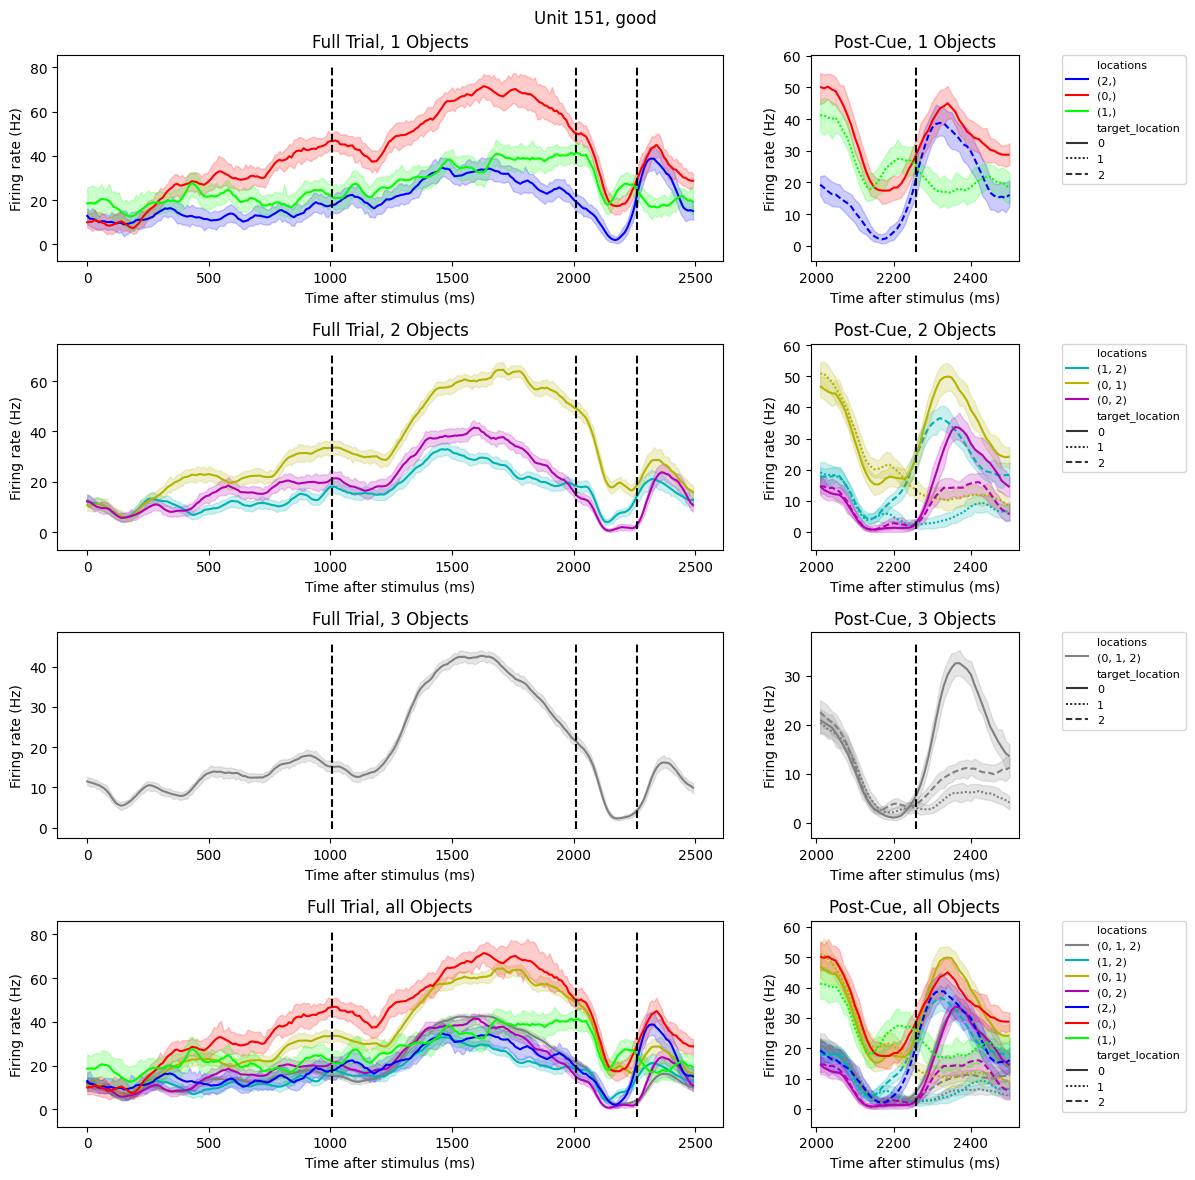

In [7]:
"""Generate PSTH plot."""

PROBE_QUALITY_UNIT = ("s0", "good", 151)

# Load spike counts and trials
quality_dir = SPIKE_COUNTS_DATA_DIR / PROBE_QUALITY_UNIT[0] / PROBE_QUALITY_UNIT[1]
spike_counts_file = (
    SPIKE_COUNTS_DATA_DIR /
    SUBJECT /
    SESSION /
    PROBE_QUALITY_UNIT[0] /
    PROBE_QUALITY_UNIT[1] /
    f"{PROBE_QUALITY_UNIT[2]}_spike_counts.pkl"
)
trials_file = spike_counts_file.with_name(f"{PROBE_QUALITY_UNIT[2]}_trials.pkl")
spike_counts = pickle.load(open(spike_counts_file, "rb"))
trials = pickle.load(open(trials_file, "rb"))

# Generate figure
fig = run_triangle.generate_psth(spike_counts, trials, session_behavior)
title = f"Unit {PROBE_QUALITY_UNIT[2]}, {spike_counts_file.parent.name}"
fig.suptitle(title)
plt.tight_layout()
fig.subplots_adjust(wspace=0.2, hspace=0.4)